# CognoRise InfoTech 
# Task 2 : 80 Cereals

# About Dataset


# Context

If you like to eat cereal, do yourself a favor and avoid this dataset at all costs. After seeing these data it will never be the same for me to eat Fruity Pebbles again.

# Content
Fields in the dataset:

Name: Name of cereal
mfr: Manufacturer of cereal
A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina
type:
cold
hot
calories: calories per serving
protein: grams of protein
fat: grams of fat
sodium: milligrams of sodium
fiber: grams of dietary fiber
carbo: grams of complex carbohydrates
sugars: grams of sugars
potass: milligrams of potassium
vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
shelf: display shelf (1, 2, or 3, counting from the floor)
weight: weight in ounces of one serving
cups: number of cups in one serving
rating: a rating of the cereals (Possibly from Consumer Reports?)
Acknowledgements
These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The original source can be found here

This dataset has been converted to CSV

Inspiration
Eat too much sugary cereal? Ruin your appetite with this dataset!

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [3]:
df= pd.read_csv(r"C:\Users\HP\Desktop\Intern\cognorise infotech\2 task\cereal.csv")

In [4]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [5]:
df.shape

(77, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [8]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [9]:
df.isnull()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [17]:
df.duplicated().any()

False

No duplicates  and no blank rows were found in the dataset. Next, we will generate histograms to identify any unusual outliers within our variables.


In [18]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


# Visualization

<Axes: title={'center': 'Overall Cereals Data Distribution'}, ylabel='Count'>

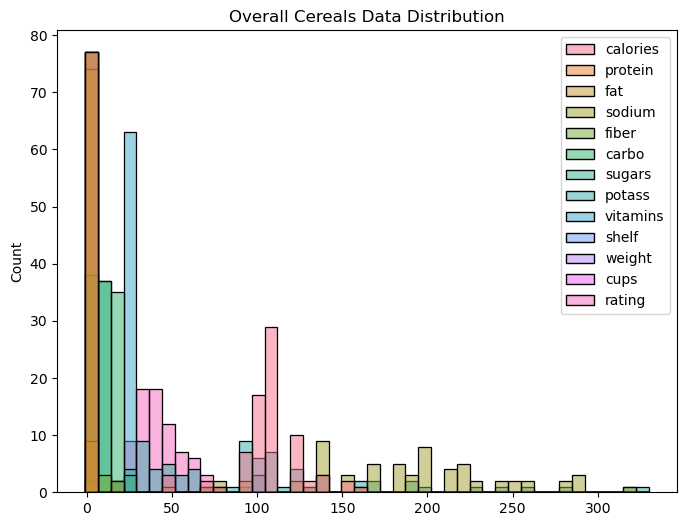

In [19]:
#Lets see the overall distribution of our data
plt.figure(figsize=(8,6))
plt.title("Overall Cereals Data Distribution")
sns.histplot(data = df)

Our data appears to be right-skewed, indicating a positive skew in the data distribution. In the following sections of our notebook, we will
create histograms for each variable to gain a deeper understanding of our data

In [22]:
# Let's create a function so that we don't need to retype everything each plot
def plot_histogram(column_data, column_name):
 plt.figure(figsize=(5, 3))
 plt.title(f"Distribution of {column_name}")
 sns.histplot(column_data, kde=True)
 plt.show()


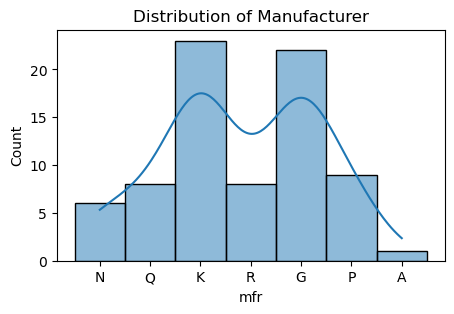

In [23]:
plot_histogram(df['mfr'], 'Manufacturer')

The histogram reveals that Kellogs and General Mills are the primary cereal manufacturers in our dataset. This bimodal distribution
indicates two prominent peaks, highlighting the dominance of these two manufacturers in our product range.

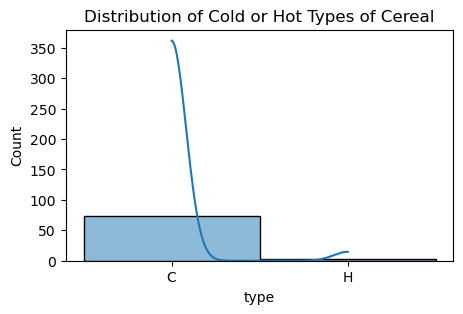

In [24]:
plot_histogram(df['type'], 'Cold or Hot Types of Cereal')

Our analysis suggests that the majority of our cereals are designed to be served cold, with fewer options suitable for hot consumption.

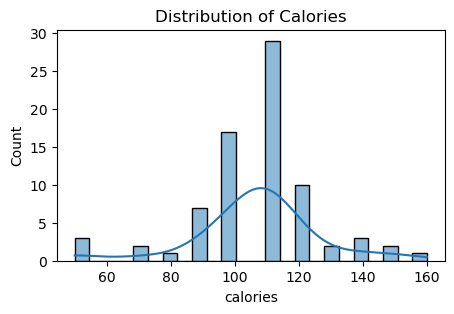

In [26]:
plot_histogram(df['calories'], 'Calories')

The distribution of calories in our dataset exhibits a normal distribution, characterized by a bell-shaped curve. Most cereals in our dataset
provide around 100-120 calories per serving

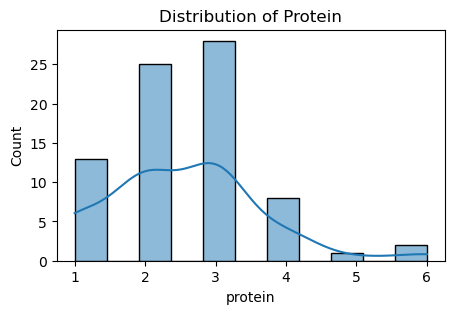

In [27]:
plot_histogram(df['protein'], 'Protein')

The distribution of protein content among our products predominantly falls within the range of 2-3 grams, as indicated by our right-skewed
histogram.

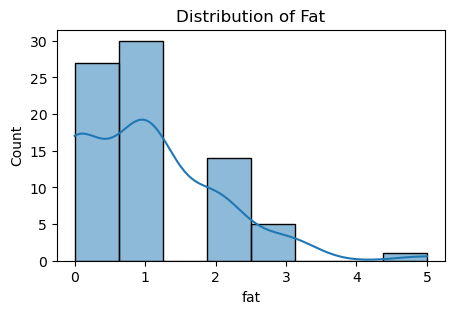

In [29]:
plot_histogram(df['fat'], 'Fat')

The distribution of fat content per gram also exhibits a right-skewed pattern, with the majority of servings containing 0-1 gram. Some
cereals have up to 5 grams of fat per serving, which, although slightly higher, does not qualify as an extreme outlier and does not
significantly impact our analysis.


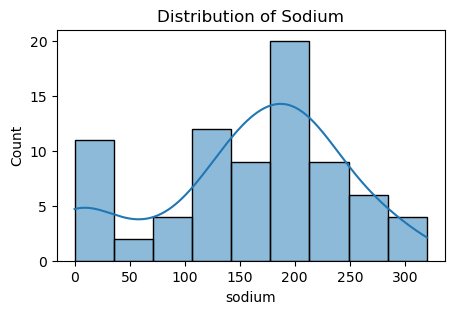

In [30]:
plot_histogram(df['sodium'], 'Sodium')

For the contents of sodium, we can observe a normal distribution of our data, showing that 150-250 milligrams of servings for our cereals.


# Presenting and Showing Visualizations
For this cereal dataset, let's create some questions that we might want to answer using visualizations to make it easier for us to convey
our findings to the stakeholders
Which brand has the most highest ratings?
plot_histogram(df['protein'], 'Protein')
plot_histogram(df['fat'], 'Fat')
plot_histogram(df['sodium'], 'Sodium')
Are there any relationships between sugar content and rating?
Is there a relationship between fat content and calories?
What are the most influential factors or features that contribute to the ratings of cereals in the Cereals80 dataset?
# Which brand has the most highest ratings?¶

<Axes: title={'center': 'Brands and Their Ratings'}, xlabel='name', ylabel='rating'>

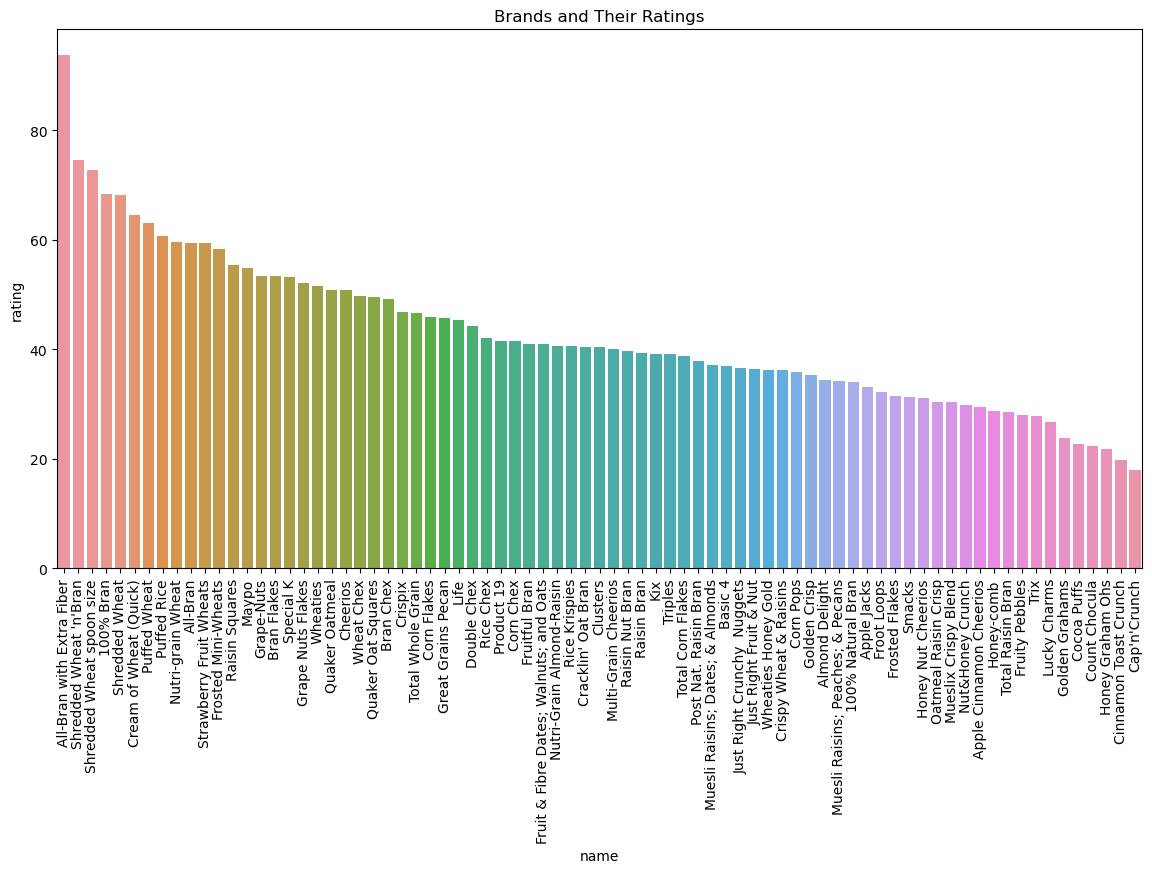

In [31]:
# Sort the DataFrame by rating in descending order
cereals_sorted = df.sort_values(by='rating', ascending=False)
plt.figure(figsize=(14, 7))
plt.title("Brands and Their Ratings")
plt.xticks(rotation=90)
sns.barplot(data=cereals_sorted, x=cereals_sorted['name'], y=cereals_sorted['rating'])

Based on our barplot, it seems that the top five brands with the highest ratings are:
All-Bran with Extra Fiber
Shredded Wheat 'n' Bran
Shredded Wheat Spoon Size
100% Bran
Shredded Wheat


# Are there any relationships between sugar content and rating?

<Axes: title={'center': 'Relationship between Sugar Content and Rating'}, xlabel='sugars', ylabel='rating'>

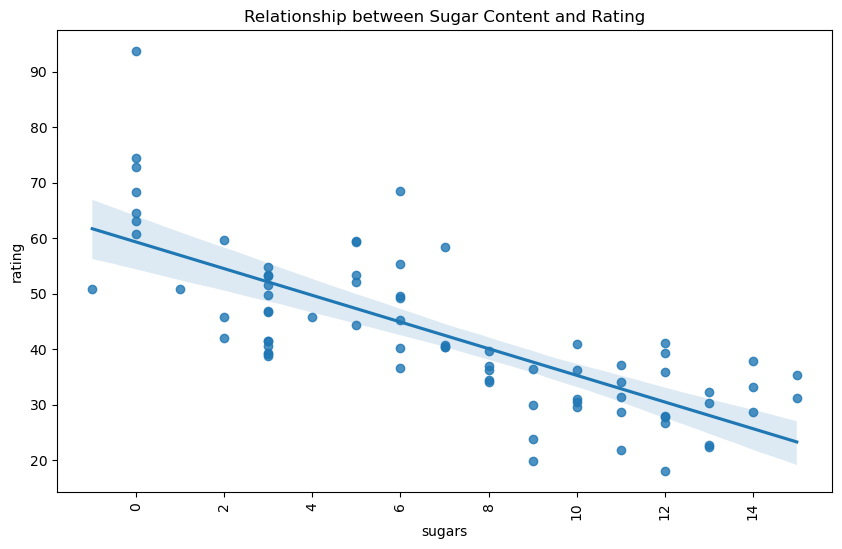

In [32]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Sugar Content and Rating')
plt.xticks(rotation=90)
sns.regplot(data=df, x=df['sugars'], y=df['rating'])

According to our regression plot analysis, there appears to be a positive correlation between lower sugar content and higher cereal
ratings.


# Is there a relationship between fat content and calories?


<Axes: title={'center': 'Relationship between Sugar Content and Rating'}, xlabel='fat', ylabel='rating'>

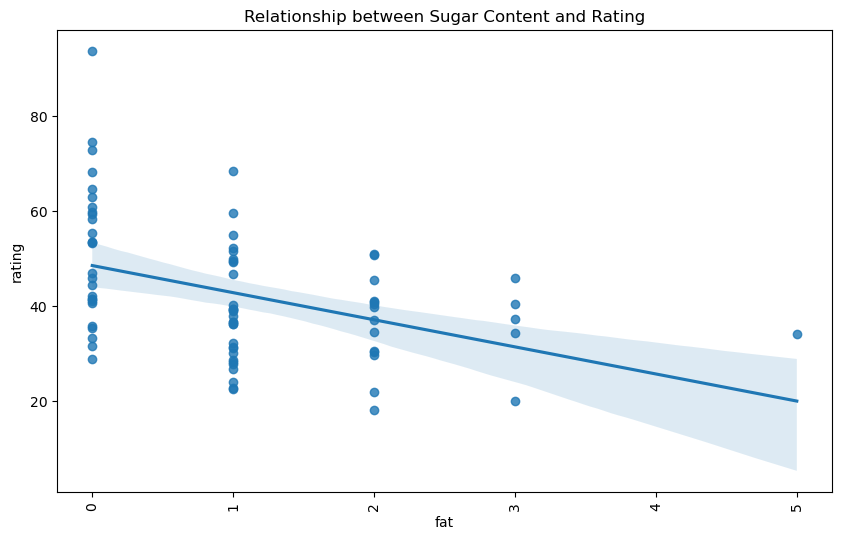

In [33]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Sugar Content and Rating')
plt.xticks(rotation=90)
sns.regplot(data=df, x=df['fat'], y=df['rating'])

Based on our regression plot analysis, it suggests a positive correlation between lower fat content and higher cereal ratings. 
this observation implies that consumers may prioritize cereals with lower fat content when making purchasing decisions

# Using the Random Forests to check for Feature Importance

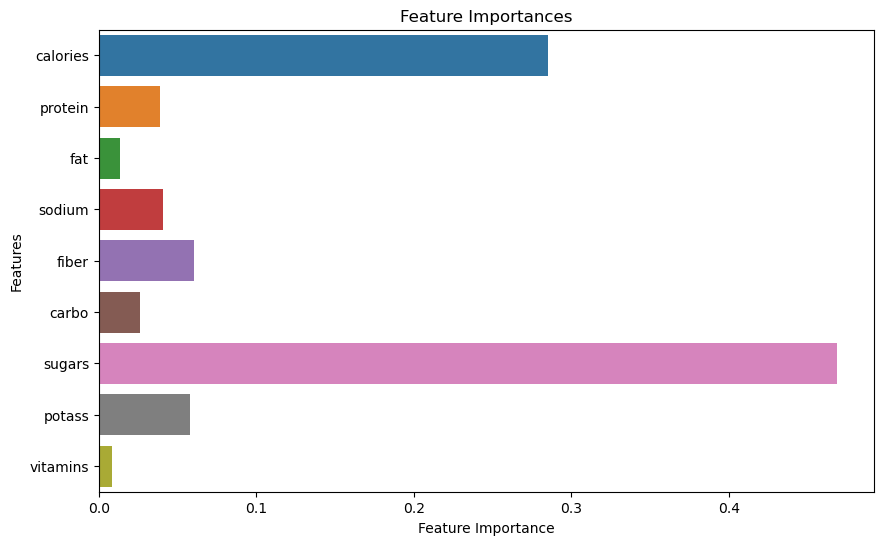

In [34]:
#Let's drop non numerical features for our X variable
X = df.drop(columns=['name', 'type', 'mfr', 'rating','shelf', 'cups', 'weight'])
y = df['rating']
#Fit our model
model = RandomForestRegressor()
model.fit(X, y)
#Assign our important features for visualization
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()